In [196]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import networkx as nx
import scipy.stats as stats
import scipy

import networkx as nx

import sklearn
from sklearn.linear_model import LinearRegression

In [212]:
N = 10
T = 1000
x = np.random.normal(0,5,size=(N,T))
C = np.random.laplace(0,1,size=(N,1))
C[-1] = 0
C = C/scipy.linalg.norm(C)
noise_level = 1.0


Y = np.dot(C.T,x)
Y += np.random.normal(0,noise_level,size=Y.shape)

## Quick Comment on Correlation vs Prediction

Correlation between two variables is calculated.

A more robust measure of correlation can be calculated through 'bootstrapping'. Here we take several different subsamples of the data.

Prediction requires an 'out of sample' distribution.

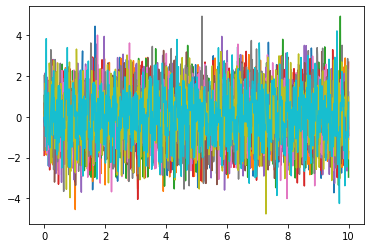

In [213]:
f = np.ones((N,1)) + np.random.normal(4,2,size=(N,1))
tvect = np.linspace(0,10,T)
x = np.array([np.sin(2 * np.pi * tvect * f[ii]) + np.random.normal(0,1,size=tvect.shape) for ii in range(N)])


plt.figure()
plt.plot(tvect,x.T)
plt.show()

In [233]:
ld = 0.7
noise_var = 25
Y_scaled = (ld)*Y + (1-ld)*np.random.normal(0,noise_var,size=Y.shape)
print(np.sqrt(np.var(Y)))
print(stats.pearsonr(Y.squeeze(),Y_scaled.squeeze()))


5.091299775445277
(0.41390941675235016, 1.1430459912341752e-42)


## Multivariable System

9


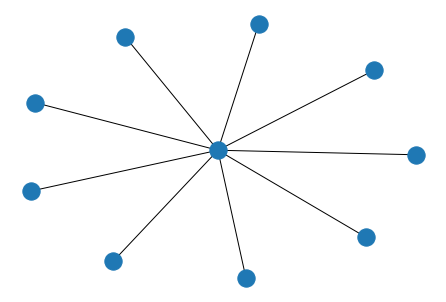

In [190]:


#Graph stuff
G = nx.Graph()
for ii in range(N):
    if C[ii] != 0:
        G.add_edge(N+1,ii)
    else:
        print(ii)

nx.draw(G)
        

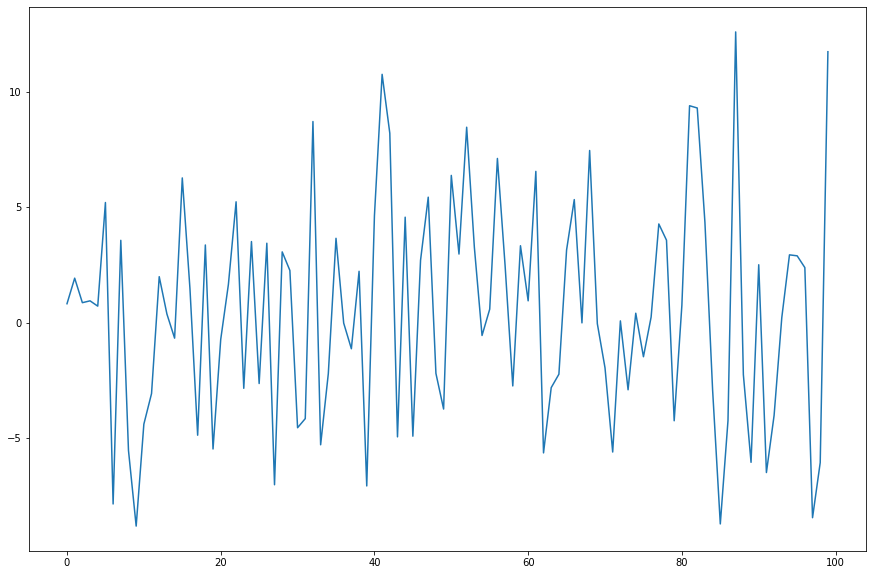

In [179]:
plt.figure(figsize=(15,10))
plt.plot(Y.T)
plt.show()

ip = [0] * N
ip_n = [0] * N

for ii in range(N):
  ip[ii] = np.dot(Y,x[ii,:])
  ip_n[ii] = ip[ii]/(scipy.linalg.norm(Y)*scipy.linalg.norm(x[ii,:]))

## Does $x_i$ relate to Y?

Now we'll go through the data and see what it tells us whether $x_i$ and Y relate.
We'll compare the data-driven approach with the definition-model.

In [180]:
for ii in range(N):
    print('Variable: ',ii)
    #print('Normalized IP: ',ip_n[ii]) #this is (effectively) equal to the PearsonR
    print('Coeff:',C[ii])
    print(stats.pearsonr(Y.squeeze(),x[ii,:]))


Variable:  0
Coeff: [-0.01134825]
(-0.1342726716358179, 0.18289787020305728)
Variable:  1
Coeff: [-0.10798813]
(0.009330716010539968, 0.9265899454839381)
Variable:  2
Coeff: [-0.40098851]
(-0.34778287513464523, 0.0003919364358760675)
Variable:  3
Coeff: [-0.26321737]
(-0.1770848889929856, 0.07797758990507501)
Variable:  4
Coeff: [0.29197379]
(0.3873585427261436, 6.848487857980238e-05)
Variable:  5
Coeff: [0.25230087]
(0.23417665798307216, 0.01902545632025193)
Variable:  6
Coeff: [0.3583161]
(0.426932715497089, 9.440696755055003e-06)
Variable:  7
Coeff: [0.6932152]
(0.6547934883886016, 1.4717097891355978e-13)
Variable:  8
Coeff: [-0.01710116]
(-0.040515294180232767, 0.688991859263549)
Variable:  9
Coeff: [0.]
(0.04076220198853011, 0.6871949591192714)


## Estimating Linkage

One of our central goals is understanding the linkage between X and Y - the vector $\vec{c}$ - that tells us how each of the variables $x_i$ contribute to the final Y.

In [181]:
C_model = LinearRegression().fit(x.T,Y.T)
C_est = C_model.coef_[0]
#print(C_est)

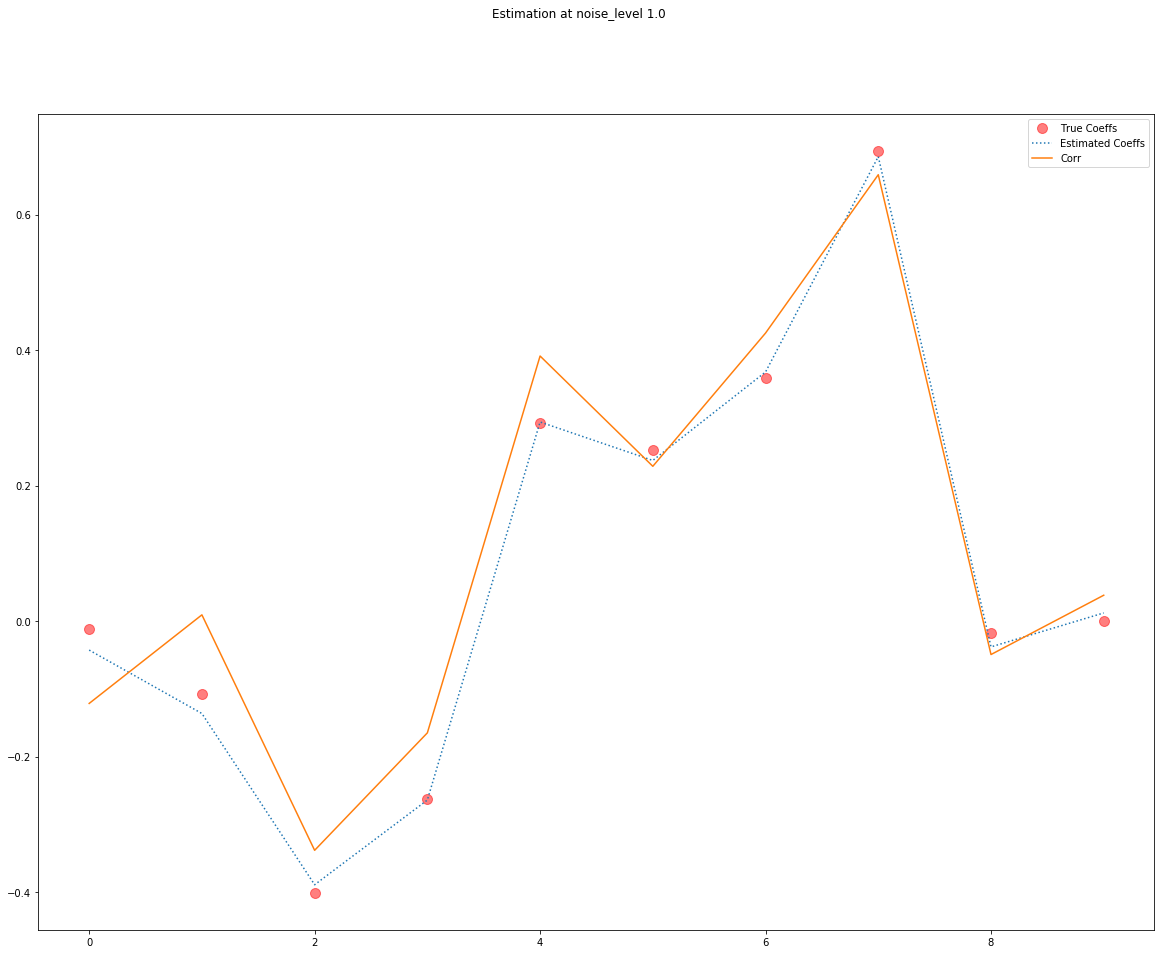

In [182]:

plt.figure(figsize=(20,15))
plt.plot(C,label='True Coeffs',alpha=0.5,color='red',linestyle='None', marker='o',markersize = 10.0)
plt.plot(C_est,linestyle='dotted',label='Estimated Coeffs')
plt.plot(ip_n,label='Corr')
plt.legend()
plt.suptitle('Estimation at noise_level ' + str(noise_level))
plt.show()
